# Neural network with Tensorflow (using MNIST dataset)


In this tutorial, we will use the machine learning library Tensorflow by creating a neural network and training it with the MNIST dataset, a databse containing 60.000 images of digits with 10.000 images for testing.
You can learn more about MNIST dataset here : [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

Now, let's get started !

To start, we will import the MNIST dataset

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Functions that will define the amout of test and training data we will load from the dataset.

In [33]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

Resize and display functions.

In [39]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

Defining variables with how many training/test examples we want to load.

Here => 55.000 ex. of handwritten digits from 0->9

In [8]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


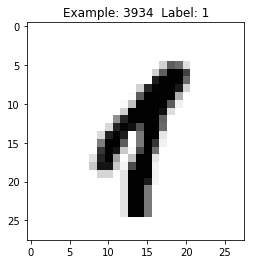

In [44]:
display_digit(ran.randint(0, x_train.shape[0]))

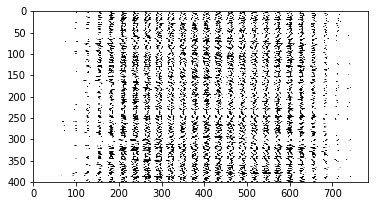

In [42]:
display_mult_flat(0,400)

Here, we are starting to use Tensorflow -> importing it and defining a session.

In [43]:
import tensorflow as tf
sess = tf.Session()

Defining a x placeholder, that we will feed with our previous x_train data.

In [12]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [13]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Defining the w weights and b bias.

In [14]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Defining our y classifier function.

In [15]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

Feeding our classifier 4 exmaples within our running tf session.

In [51]:
x_train, y_train = TRAIN_SIZE(3)
sess.run(tf.global_variables_initializer())

print(sess.run(y, feed_dict={x: x_train}))

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (3, 784)
y_train Examples Loaded = (3, 10)

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


In [34]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([ 0.11634309,  0.10579926,  0.7778576 ], dtype=float32)

Creating our cross_entropy function => cost function, evaluating how good or bad we are classifying.

In [19]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [20]:
j = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]
k = [0,0,0,1,0,0,0,0,0,0]

In [21]:
-np.log(j)
-np.multiply(np.log(j),k)

array([ 0.        ,  0.        ,  0.        ,  0.10536052,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [22]:
k = [0,0,1,0,0,0,0,0,0,0]
np.sum(-np.multiply(np.log(j),k))

4.6051701859880909

Starting to train our classifier.

We are setting to reasonable values (to don't wait for a while).

In [58]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


Initializing variables used by our tensorflow graph

In [59]:
init = tf.global_variables_initializer()

sess.run(init)

Then, we can start to train our classifier with the optimizer Gradiet Descent.

We define variables and the training method to measure the accuracy.

In [60]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Then we define a loop for iterating the training runs, feeding in values x_train and y_train.

Accuracy will be runned to calculate the accuracy by comparing y and y_test.

In [61]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1882
Training Step:100  Accuracy =  0.8647  Loss = 0.580297
Training Step:200  Accuracy =  0.879  Loss = 0.459822
Training Step:300  Accuracy =  0.8866  Loss = 0.408572
Training Step:400  Accuracy =  0.8904  Loss = 0.378081
Training Step:500  Accuracy =  0.8943  Loss = 0.356976
Training Step:600  Accuracy =  0.8974  Loss = 0.34105
Training Step:700  Accuracy =  0.8984  Loss = 0.32835
Training Step:800  Accuracy =  0.9  Loss = 0.317827
Training Step:900  Accuracy =  0.9005  Loss = 0.308862
Training Step:1000  Accuracy =  0.9009  Loss = 0.301065
Training Step:1100  Accuracy =  0.9023  Loss = 0.29417
Training Step:1200  Accuracy =  0.9029  Loss = 0.287995
Training Step:1300  Accuracy =  0.9033  Loss = 0.282406
Training Step:1400  Accuracy =  0.9039  Loss = 0.277303
Training Step:1500  Accuracy =  0.9048  Loss = 0.27261
Training Step:1600  Accuracy =  0.9057  Loss = 0.268267
Training Step:1700  Accuracy =  0.9062  Loss = 0.264226
Training Step:

Now, we will do a loop to visualize our calculated weights.

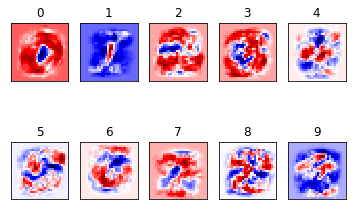

In [62]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    
plt.show()

As we have our cheat sheet, jsut let's load an example and apply our classifier to it.

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


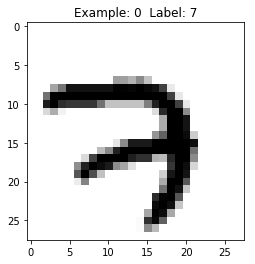

In [37]:
x_train, y_train = TRAIN_SIZE(1)
display_digit(0)

In [29]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[  2.12480318e-05   1.16469255e-05   8.96317363e-02   1.92015339e-02
    8.20864108e-04   1.25168190e-05   3.85382300e-05   8.53746057e-01
    6.91888854e-03   2.95969490e-02]]


The matrix is not that useful, the argmax function will give us the prediction.

In [30]:
answer.argmax()

7

Now, as far as we are, let do a function to make a prediction on a random digit in the dataset :

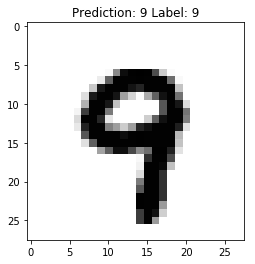

In [50]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_compare(ran.randint(0, 55000))